In [4]:
import torch
import numpy as np
import sympy
from biases.hamiltonian import ChainPendulum, Animation2d, MLE,MLE2
from biases.datasets import RigidBodyDataset
from torchdiffeq import odeint
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
P = ChainPendulum(8)
z0 = P.sample_initial_conditions(1).double()
bs = z0.shape[0]
xp = torch.stack([z0[:,0].double(),P.M@z0[:,1].double()],dim=1).reshape(bs,-1)
ts = torch.linspace(0,1000,100).double()
es = MLE2(xp,P.dynamics(wgrad=True),ts,rtol=1e-6)

In [ ]:
plt.plot(es[1:,0,-1]/ts[1:])

In [26]:
es[1:,0,-1]/ts[1:]

tensor([0.3096, 0.4782, 0.4265, 0.4239, 0.4710, 0.4626, 0.4632, 0.4701, 0.4531,
        0.4529, 0.4555, 0.4560, 0.4426, 0.4160, 0.4254, 0.4259, 0.4292, 0.4243,
        0.4297, 0.4153, 0.4112, 0.4208, 0.4308, 0.4294, 0.4299, 0.4276, 0.4272,
        0.4239, 0.4057, 0.4066, 0.4076, 0.4105, 0.4177, 0.4211, 0.4213, 0.4229,
        0.4230, 0.4229, 0.4200, 0.4260, 0.4254, 0.4258, 0.4270, 0.4256, 0.4228,
        0.4231, 0.4235, 0.4240, 0.4213, 0.4195, 0.4192, 0.4170, 0.4166, 0.4164,
        0.4193, 0.4207, 0.4229, 0.4163, 0.4173, 0.4175, 0.4205, 0.4248, 0.4276,
        0.4282, 0.4252, 0.4265, 0.4270, 0.4230, 0.4195, 0.4221, 0.4192, 0.4190,
        0.4190, 0.4233, 0.4232, 0.4259, 0.4287, 0.4287, 0.4322, 0.4332, 0.4295,
        0.4273, 0.4307, 0.4279, 0.4265, 0.4278, 0.4281, 0.4287, 0.4290, 0.4267,
        0.4285, 0.4293, 0.4321, 0.4336, 0.4338, 0.4355, 0.4331, 0.4328, 0.4318],
       dtype=torch.float64)

In [33]:
P = ChainPendulum(6)
z0s = P.sample_initial_conditions(1).double()
ts = torch.linspace(0,100,10000).double()
zt = P.integrate(z0s,ts).float()

In [34]:
xp = torch.stack([zt[0,:,0].double(),P.M@zt[0,:,1].double()],dim=1).reshape(ts.shape[0],-1)
D = xp.shape[-1]

In [35]:
exps = MLE(xp,ts,P.dynamics(wgrad=True))#,v0=xp[0])

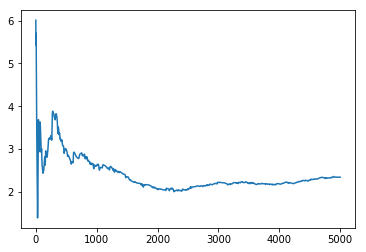

In [36]:
plt.plot(np.cumsum(exps[::-1][:5000])/(1+np.arange(5000)))

In [32]:
(np.cumsum(exps[::-1][:5000])/(1+np.arange(5000)))[-100:]

array([0.02083264, 0.02083721, 0.02084123, 0.02084469, 0.02084759,
       0.02084995, 0.02085177, 0.02085305, 0.02085378, 0.02085398,
       0.02085363, 0.02085274, 0.0208513 , 0.0208493 , 0.02084673,
       0.02084359, 0.02083987, 0.02083555, 0.02083062, 0.02082507,
       0.02081888, 0.02081203, 0.02080451, 0.02079629, 0.02078737,
       0.0207777 , 0.02076728, 0.02075608, 0.02074408, 0.02073124,
       0.02071754, 0.02070297, 0.02068747, 0.02067104, 0.02065364,
       0.02063524, 0.02061581, 0.02059531, 0.02057373, 0.02055102,
       0.02052716, 0.02050211, 0.02047584, 0.02044833, 0.02041953,
       0.02038943, 0.02035798, 0.02032516, 0.02029095, 0.0202553 ,
       0.02021819, 0.0201796 , 0.0201395 , 0.02009787, 0.02005468,
       0.0200099 , 0.01996353, 0.01991553, 0.01986589, 0.0198146 ,
       0.01976163, 0.01970699, 0.01965065, 0.01959261, 0.01953286,
       0.01947139, 0.01940822, 0.01934332, 0.01927671, 0.0192084 ,
       0.01913838, 0.01906666, 0.01899327, 0.01891821, 0.01884

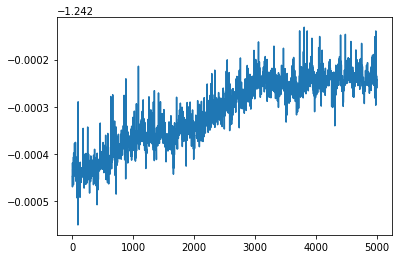

In [29]:
plt.plot(P.hamiltonian(ts,xp))

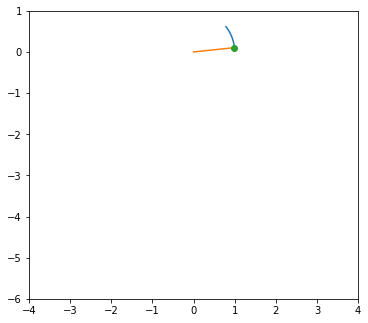

In [17]:
xt = zt[0,:,0,:].permute(1,2,0).cpu()
HTML(Animation2d(xt.float(),P,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [13]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [51]:
body = ChainPendulum(5,beams=False)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]*2#*.01
bs,_,n,d = z0.shape
z0 = z0.reshape(bs,2*n*d)

In [88]:
body.sample_initial_conditions(1).shape

torch.Size([1, 2, 5, 2])

In [86]:
body.__class__

core.hamiltonian.ChainPendulum

In [54]:
ts = torch.linspace(0,50,1000)
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-6, method='rk4').permute(1, 0, 2)


In [55]:
zs.shape

torch.Size([1, 1000, 20])

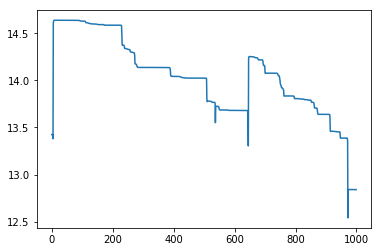

In [56]:
plt.plot(GravityHamiltonian(body.M,body.Minv,None,zs[0]))

In [38]:
zt.shape

torch.Size([1, 5000, 2, 1, 2])

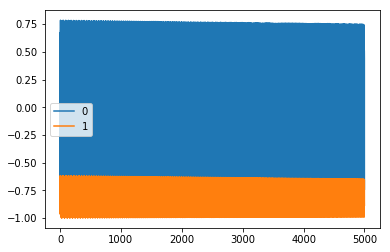

In [39]:
# xt = zs[0,:,:n*d].reshape(len(ts),n,d).permute(1,2,0)
# pt = zs[0,:,n*d:].reshape(len(ts),n,d).permute(1,2,0)
n = len(P.body_graph.nodes)
d=2
for i in range(n*d):
    plt.plot(zt[0,:,0,0,i])
plt.legend(range(n*d))

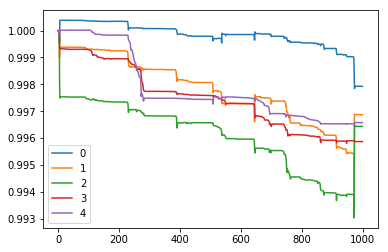

In [58]:
plt.plot((xt[0]**2).sum(0))
for i in range(n-1):
    plt.plot(((xt[1:]-xt[:-1])[i]**2).sum(0))
plt.legend(range(n))
#plt.yscale('log')

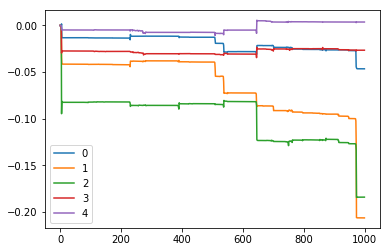

In [59]:
plt.plot((pt[0]*xt[0]).sum(0))
for i in range(n-1):
    plt.plot(((pt[1:]-pt[:-1])[i]*(xt[1:]-xt[:-1])[i]).sum(0))
plt.legend(range(n))
#plt.yscale('log')

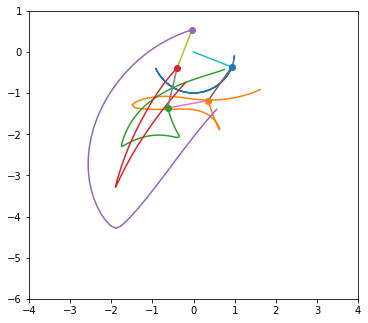

In [60]:
HTML(Animation2d(xt,body,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [42]:
body.body_graph.nodes[0]['m']

KeyError: 'm'

In [44]:
[n for n in body.body_graph.nodes.items()]

[(0, {'tether': tensor([0., 0.]), 'l': 1}), (1, {}), (2, {})]

In [64]:
def tril_mask(value):
    n = value.size(-1)
    coords = value.new(n)
    torch.arange(n, out=coords)
    return coords <= coords.view(n, 1)

In [69]:
tril_mask(torch.eye(3)).float()@tril_mask(torch.eye(3)).float().T

tensor([[1., 1., 1.],
        [1., 2., 2.],
        [1., 2., 3.]])

In [70]:
torch.nn.Parameter(torch.eye(3))

Parameter containing:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], requires_grad=True)

In [71]:
a = torch.randn(3, 3)
a = torch.mm(a, a.t()) + 1e-05 * torch.eye(3) # make symmetric positive definite
torch.cholesky(a)

tensor([[ 1.8690,  0.0000,  0.0000],
        [-0.8443,  1.0068,  0.0000],
        [-1.8397,  0.0835,  0.9305]])

In [72]:
tril_mask(a)*a

tensor([[ 3.4932, -0.0000, -0.0000],
        [-1.5780,  1.7265,  0.0000],
        [-3.4385,  1.6373,  4.2575]])

In [81]:
_m_lower = torch.nn.Parameter(.1*torch.randn(3,3)+torch.eye(3))
    
def M():
    lower_diag = tril_mask(_m_lower)*_m_lower
    return lower_diag@lower_diag.T
def Minv():
    lower_diag = tril_mask(_m_lower)*_m_lower
    return torch.cholesky_inverse(lower_diag)
def MinvSolve(Y):
    lower_diag = tril_mask(_m_lower)*_m_lower
    return torch.cholesky_solve(Y,lower_diag)

In [82]:
Minv()@M()

tensor([[ 1.0000e+00, -1.0992e-09, -7.5389e-09],
        [ 1.8597e-09,  1.0000e+00, -1.6480e-09],
        [-1.0471e-08,  6.6824e-09,  1.0000e+00]], grad_fn=<MmBackward>)

In [83]:
M()@Minv()

tensor([[ 1.0000e+00,  1.8597e-09, -1.0471e-08],
        [-1.0992e-09,  1.0000e+00,  6.6824e-09],
        [-7.5389e-09, -1.6480e-09,  1.0000e+00]], grad_fn=<MmBackward>)

In [84]:
MinvSolve(M())

tensor([[ 1.0000e+00,  1.6903e-10, -1.4738e-08],
        [-1.1493e-09,  1.0000e+00,  1.3626e-08],
        [-2.1771e-09,  1.2268e-09,  1.0000e+00]],
       grad_fn=<CholeskySolveBackward>)